# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# pip install citypy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

618

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + ('Grand Junction')).json()

response

{'coord': {'lon': -108.55, 'lat': 39.06},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 32.85,
  'feels_like': 28.09,
  'temp_min': 32.78,
  'temp_max': 33,
  'pressure': 1011,
  'humidity': 15},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 330, 'gust': 8.2},
 'clouds': {'all': 1},
 'dt': 1598827008,
 'sys': {'type': 1,
  'id': 4219,
  'country': 'US',
  'sunrise': 1598791312,
  'sunset': 1598838471},
 'timezone': -21600,
 'id': 5423573,
 'name': 'Grand Junction',
 'cod': 200}

# Perform API Calls

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng=[]
temp = []
Humidity= []
Cloudiness = []
Wind_Speed =[]
city=[]
country=[]
number = 1
sets = 1 

print(f"Begining Data Retrieval:\n-----------------------------")
# Loop through the list of cities and perform a request for data on each
 
for citi in cities:
    try:
        response = requests.get(query_url + (citi)).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        city.append(response['name'])
        print(f"Processing Record {number} Set {sets}- {citi}")
        number=number+1
        if (number % 51 == 0):
            sets=sets+1
            number=1
    except KeyError:
        print('An error occurred skipping.. ')

print('complete')
        

# response

Begining Data Retrieval:
-----------------------------
Processing Record 1 Set 1- bethel
Processing Record 2 Set 1- kayerkan
Processing Record 3 Set 1- busselton
Processing Record 4 Set 1- butaritari
Processing Record 5 Set 1- sola
Processing Record 6 Set 1- zhangjiakou
Processing Record 7 Set 1- pevek
Processing Record 8 Set 1- thompson
Processing Record 9 Set 1- yaan
An error occurred skipping.. 
Processing Record 10 Set 1- ushuaia
Processing Record 11 Set 1- pangnirtung
Processing Record 12 Set 1- juba
Processing Record 13 Set 1- faanui
Processing Record 14 Set 1- sobolevo
An error occurred skipping.. 
Processing Record 15 Set 1- kamiiso
Processing Record 16 Set 1- lavrentiya
Processing Record 17 Set 1- dingle
Processing Record 18 Set 1- barrow
Processing Record 19 Set 1- lewiston
Processing Record 20 Set 1- tasiilaq
Processing Record 21 Set 1- kodiak
Processing Record 22 Set 1- vaini
Processing Record 23 Set 1- rikitea
Processing Record 24 Set 1- minudasht
An error occurred skippin

Processing Record 2 Set 5- lebu
Processing Record 3 Set 5- sitka
Processing Record 4 Set 5- ikeda
Processing Record 5 Set 5- atasu
Processing Record 6 Set 5- san cristobal
Processing Record 7 Set 5- ponta do sol
Processing Record 8 Set 5- beaune
Processing Record 9 Set 5- sabha
Processing Record 10 Set 5- biedenkopf
Processing Record 11 Set 5- kantunilkin
Processing Record 12 Set 5- corinto
Processing Record 13 Set 5- krasnyy chikoy
An error occurred skipping.. 
Processing Record 14 Set 5- san rafael del sur
Processing Record 15 Set 5- san carlos del zulia
Processing Record 16 Set 5- souillac
An error occurred skipping.. 
Processing Record 17 Set 5- gari
Processing Record 18 Set 5- bathsheba
Processing Record 19 Set 5- guerrero negro
Processing Record 20 Set 5- biloela
Processing Record 21 Set 5- honiara
Processing Record 22 Set 5- methala
Processing Record 23 Set 5- aksha
Processing Record 24 Set 5- laguna
Processing Record 25 Set 5- okhotsk
Processing Record 26 Set 5- russell
Process

An error occurred skipping.. 
Processing Record 9 Set 9- opuwo
Processing Record 10 Set 9- pisco
Processing Record 11 Set 9- cap malheureux
Processing Record 12 Set 9- maine-soroa
Processing Record 13 Set 9- ostrovnoy
Processing Record 14 Set 9- dangriga
Processing Record 15 Set 9- phangnga
Processing Record 16 Set 9- charters towers
Processing Record 17 Set 9- luganville
Processing Record 18 Set 9- isangel
Processing Record 19 Set 9- marawi
An error occurred skipping.. 
Processing Record 20 Set 9- xinan
Processing Record 21 Set 9- eureka
Processing Record 22 Set 9- shache
Processing Record 23 Set 9- srikakulam
Processing Record 24 Set 9- kyshtovka
Processing Record 25 Set 9- evensk
Processing Record 26 Set 9- lithgow
An error occurred skipping.. 
Processing Record 27 Set 9- vallenar
Processing Record 28 Set 9- hearst
Processing Record 29 Set 9- bima
Processing Record 30 Set 9- labuan
An error occurred skipping.. 
An error occurred skipping.. 
Processing Record 31 Set 9- tazovskiy
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "city": city,
    "lat": lat,
    "lng": lng,
    "max temp": temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "country": country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather_data.csv')
weather_data.head(15)

,city,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,country
0,Bethel,41.37,-73.41,75.99,38,1,10.29,US
1,Kayerkan,69.35,87.76,44.60,100,90,11.18,RU
2,Busselton,-33.65,115.33,39.00,77,0,3.94,AU
3,Butaritari,3.07,172.79,83.19,70,13,10.96,KI
4,Sola,-13.88,167.55,82.40,78,75,9.17,VU
5,Zhangjiakou,40.81,114.88,62.49,81,100,5.59,CN
6,Pevek,69.70,170.31,39.97,78,14,7.05,RU
7,Thompson,55.74,-97.86,53.60,93,75,8.05,CA
8,Yaan,7.38,8.57,72.59,95,76,6.26,NG
9,Ushuaia,-54.80,-68.30,28.40,92,40,24.16,AR


In [13]:
weather_dict_sm = {
    "city": city,
    "max temp": temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed
    }
weather_data_sm = pd.DataFrame(weather_dict_sm)
weather_data_sm.to_csv('weather_data_sm.csv')
weather_data_sm.head(15)
# weather_data.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>city</th>\n      <th>lat</th>\n      <th>lng</th>\n      <th>max temp</th>\n      <th>Humidity</th>\n      <th>Cloudiness</th>\n      <th>Wind Speed</th>\n      <th>country</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Bethel</td>\n      <td>41.37</td>\n      <td>-73.41</td>\n      <td>75.99</td>\n      <td>38</td>\n      <td>1</td>\n      <td>10.29</td>\n      <td>US</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Kayerkan</td>\n      <td>69.35</td>\n      <td>87.76</td>\n      <td>44.60</td>\n      <td>100</td>\n      <td>90</td>\n      <td>11.18</td>\n      <td>RU</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Busselton</td>\n      <td>-33.65</td>\n      <td>115.33</td>\n      <td>39.00</td>\n      <td>77</td>\n      <td>0</td>\n      <td>3.94</td>\n      <td>AU</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Butarita

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
NA=weather_data.Humidity <= 100
NA

0      True
1      True
2      True
3      True
4      True
       ... 
545    True
546    True
547    True
548    True
549    True
Name: Humidity, Length: 550, dtype: bool

In [9]:
# Extract relevant fields from the data frame
clean_weather_data=weather_data[NA]

# len(clean_weather_data)
# Export the City_Data into a csv
clean_weather_data.to_csv('clean_weather_data.csv')
clean_weather_data.head(15)

,city,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,country
0,Hambantota,6.12,81.12,82.40,83,28,9.17,LK
1,Hermanus,-34.42,19.23,54.00,69,90,8.99,ZA
2,Yerofey Pavlovich,53.97,121.97,45.70,75,99,6.87,RU
3,Bredasdorp,-34.53,20.04,51.80,81,98,14.99,ZA
4,George Town,5.41,100.34,82.40,83,20,1.86,MY
5,Yellowknife,62.46,-114.35,59.00,62,75,5.82,CA
6,Bilibino,68.05,166.44,36.30,89,97,7.87,RU
7,Arawa,-6.21,155.54,75.78,83,11,4.52,PG
8,Baykit,61.67,96.37,53.91,64,100,3.33,RU
9,Vila Velha,-20.33,-40.29,82.99,65,20,14.99,BR


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [5]:
# Build a scatter plot for each data type
plt.figure(figsize=(10,6)) 
plt.scatter(clean_weather_data["lat"], clean_weather_data["max temp"], marker="o", 
            edgecolors="black", c=clean_weather_data["max temp"], cmap='jet')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

NameError: name 'clean_weather_data' is not defined

<Figure size 720x432 with 0 Axes>

## Latitude vs. Humidity Plot

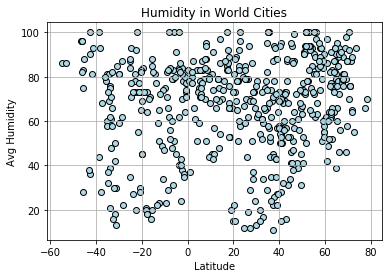

In [11]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Humidity"], marker="o", 
            edgecolors="black", color='lightblue')

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Avg Humidity")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

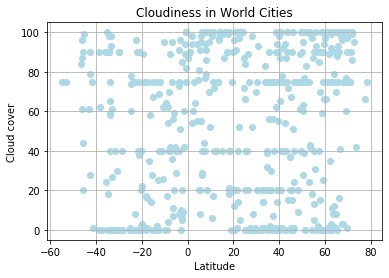

In [12]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Cloudiness"], marker="o", color='lightblue')

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

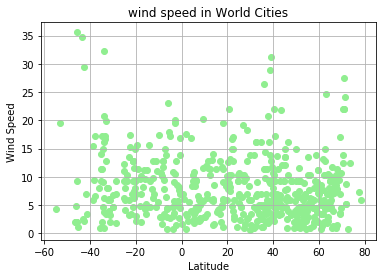

In [13]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Wind Speed"], marker="o", color='lightgreen')

# Incorporate the other graph properties
plt.title("wind speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("windInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north = clean_weather_data['lat']>=0
north_df = clean_weather_data[north]

south = clean_weather_data['lat']<=0
south_df = clean_weather_data[south]

north_df.head(10)

,city,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,country
0,Hambantota,6.12,81.12,82.40,83,28,9.17,LK
2,Yerofey Pavlovich,53.97,121.97,45.70,75,99,6.87,RU
4,George Town,5.41,100.34,82.40,83,20,1.86,MY
5,Yellowknife,62.46,-114.35,59.00,62,75,5.82,CA
6,Bilibino,68.05,166.44,36.30,89,97,7.87,RU
8,Baykit,61.67,96.37,53.91,64,100,3.33,RU
10,Kungurtug,50.60,97.52,51.04,74,28,2.89,RU
13,Ribeira Grande,38.52,-28.70,75.20,88,75,28.86,PT
14,Butaritari,3.07,172.79,81.09,61,64,5.61,KI
17,Ārvi,20.98,78.23,76.26,89,100,13.13,IN


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

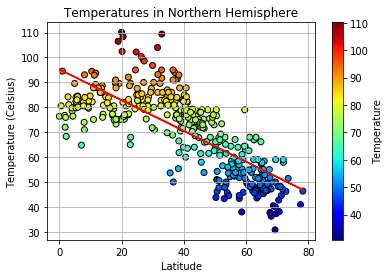

In [16]:
plt.scatter(north_df["lat"], north_df["max temp"], marker="o", 
            edgecolors="black", c=north_df["max temp"], cmap='jet')

plt.title("Temperatures in Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Temperature")
plt.grid(True)

# plot regression line
x_values = north_df["lat"].astype(float)
y_values = north_df["max temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Save the figure
plt.savefig("TemperatureInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

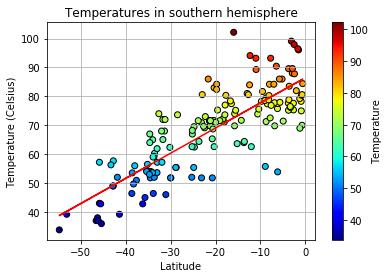

In [17]:
plt.scatter(south_df["lat"], south_df["max temp"], marker="o", 
            edgecolors="black", c=south_df["max temp"], cmap='jet')

plt.title("Temperatures in southern hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Temperature")
plt.grid(True)


# calculate regression line
x_values = south_df["lat"].astype(float)
y_values = south_df["max temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Save the figure
plt.savefig("TemperatureInnorthhemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

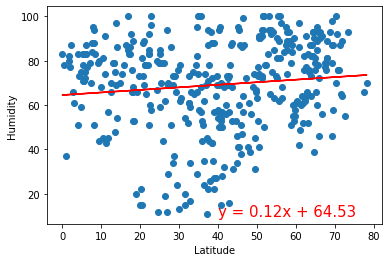

In [18]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("HumidityInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

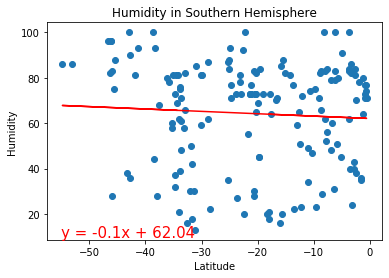

In [19]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity in Southern Hemisphere')

# Save the figure
plt.savefig("HumidityInsouthernHemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

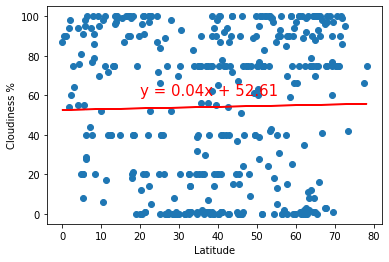

In [20]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Save the figure
plt.savefig("CloudsInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

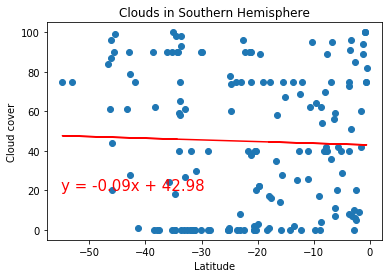

In [21]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud cover')
plt.title('Clouds in Southern Hemisphere')

# Save the figure
plt.savefig("CloudsInsouthernHemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

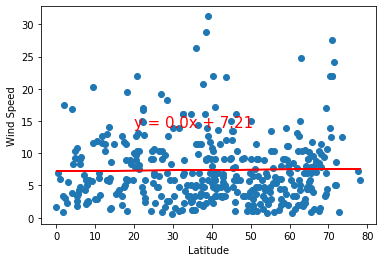

In [22]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,14),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("WindInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

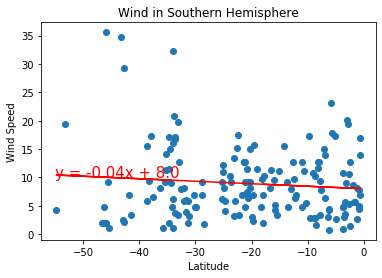

In [23]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind in Southern Hemisphere')

# Save the figure
plt.savefig("WibdInsouthernHemisphere.png")

# Show plot
plt.show()